In [25]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask 

m = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/base_model_mars/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m20 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/albedo20.00/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

Comparison_file = m20

set=[m,m20]
nameset=[['Mars', 'Obliq20'], set]

In [26]:
# Figuring out when summer is on Mars to use as a reference
# So in the Northern Summer (179 days long) the South pole will be at it's coldest (wikipedia)
# In the Southern summer (154 days long) the South pole is at it's warmest
# Associate the % of the points in which T>T_sub with this 25-30% that evaporates
# So if all 7 points sublime during the summer if only 6 points sublime, 6/7 *30% of the mass sublimes

# FINDINGS:
# During summers, all 7 points are above the sublimation temperature leading to 25-30% sublimation.
# Therefore, throughout the year use n.o points /6 * 30% * mass to figure out how much mass evaporates
# (NOTE SEASONS LENGTH CHANGES WITH OBLIQUITY)

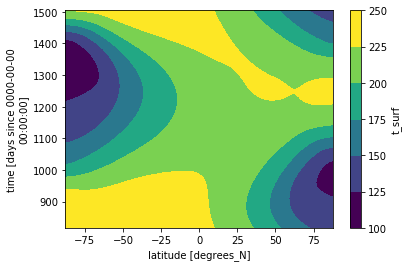

NORTH:  1158.2159722222223 1340.41875 (179,)
SOUTH:  817.3534722222222 1504.1965277777779 (154,)


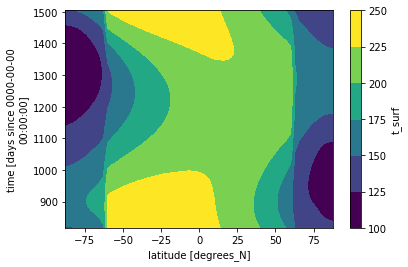

In [62]:
#FIGURING OUT WHEN THE SUMMERS ARE IN THE NH AND SH - plots are shown for clarification

#Same code as below just changed for neatness
m2=m.t_surf.sel(method='nearest').mean(dim='lon')
start = m2.time[-1] -687
m_annual2 = m2[m2.time>start]

m_annual2.plot.contourf()
plt.show()

# Selection of summer days in NH and SH

m_annual4=m_annual2.sel(lat=90, method='nearest') #NORTHERN SUMMER - 179 days
north_summer=m_annual4[m_annual4.values>208]
print('NORTH: ',north_summer.time.values.min(),north_summer.time.values.max(), north_summer.time.shape)

m_annual3=m_annual2.sel(lat=-90, method='nearest') #SOUTHERN SUMMER - 154 days
south_summer=m_annual3[m_annual3.values>212]
print('SOUTH: ',south_summer.time.values.min(),south_summer.time.values.max(), south_summer.time.shape)

# compare2=Comparison_file.t_surf.sel(method='nearest').mean(dim='lon')
# start = compare2.time[-1] -687
# compare_annual2 = compare2[compare2.time>start]

compare_annual2.plot.contourf()
plt.show()


In [63]:
# For Northern Summer - 7 means 30% sublimes
# The data is first narrowed down to the past year

m1=m.t_surf.sel(method='nearest').mean(dim='lon')
start = m1.time[-1] -687
m_annual = m1[m1.time>start]

#And then narrowed to the northern summer

m_north_sum = m_annual[m_annual.time>m_annual.time.values[332]] 
m_north_sum = m_north_sum[m_north_sum.time< m_north_sum.time.values[179]]

timecount=179 #This represents the length of the time period

#NORTH POLE SUBLIMATION TEMPERATURE COUNT    
mars_north_sum=[] #List of number of points at each time in the north pole that are above sublimation temperature 
mars_north_sum_diff =[] #Difference between values

#This for loop goes through each day
for time in range(timecount):
    values_at_time=m_north_sum.values[time] #Looks at each set of temperatures up to timecount
#     print('Values at Time',m_annual.time.values[time], ':', values_at_time) # Values at first time there

    last_7_values = values_at_time[57:64] # Looks at the last 7 temperatures as these are those at the correct lat
#     print(first_7_values)
    count=0
    diff=0
    for gas in last_7_values: #Counts each term within these 7 that is above T_sublime
        if gas>147:
            count+=1
            diff =gas - 147
#     print(count)
    mars_north_sum.append(count)
    mars_north_sum_diff.append(diff)

#      print(m_annual.lat.values[0:7]) #First 7 latitude values are below -70, Last 7 latitudes are above 70 degrees

#The same method is used for each analysis

In [64]:
# For Southern Summer - 7 means 30% sublimes
m1=m.t_surf.sel(method='nearest').mean(dim='lon')
start = m1.time[-1] -687
m_annual = m1[m1.time>start]

m_south_sum = m_annual[m_annual.time>m_annual.time.values[0]] 
m_south_sum = m_south_sum[m_south_sum.time< m_south_sum.time.values[154]]

timecount=154

#SOUTH POLE SUBLIMATION TEMPERATURE COUNT    
mars_south_sum=[] #List of number of points at each time in the north pole that are above sublimation temperature 
mars_south_sum_diff=[]
for time in range(timecount):
    values_at_time=m_south_sum.values[time] #Up to 1343
#     print('Values at Time',m_annual.time.values[time], ':', values_at_time) # Values at first time there

    last_7_values = values_at_time[0:7]
#     print(first_7_values)
    count=0
    diff=0
    for gas in last_7_values:
        if gas>147:
            count+=1
            diff = gas - 147
#     print(count)
    mars_south_sum.append(count)
    mars_south_sum_diff.append(diff)

#      print(m_annual.lat.values[0:7]) #First 6 latitude values are below -70

# print(mars_south_sum_diff)

In [85]:
# For one year - just to plot as comparison
m1=m.t_surf.sel(method='nearest').mean(dim='lon')
start = m1.time[-1] -687*2
m_annual = m1[m1.time>start]

timecount=1340

# NORTH POLE SUBLIMATION TEMPERATURE COUNT
mars_north=[] #List of number of points at each time in the north pole that are above sublimation temperature 
mars_north_diff=[]

for time in range(timecount):
    values_at_time=m_annual.values[time] #Up to 1343
#     print('Values at Time',m_annual.time.values[time], ':', values_at_time) # Values at first time there
    first_7_values = values_at_time[57:64]
#     print(first_7_values)
    count=0
    diff=0
    for gas in first_7_values:
        if gas>147:
            count+=1
            diff=gas-147
#     print(count)
    mars_north.append(count)
    mars_north_diff.append(diff)
#     print(m_annual.lat.values[57:64]) #First 6 latitude values
   

#SOUTH POLE SUBLIMATION TEMPERATURE COUNT    
mars_south=[] #List of number of points at each time in the north pole that are above sublimation temperature 
mars_south_diff=[]

for time in range(timecount):
    values_at_time=m_annual.values[time] #Up to 1343
#     print('Values at Time',m_annual.time.values[time], ':', values_at_time) # Values at first time there

    last_7_values = values_at_time[0:7]
#     print(first_7_values)
    count=0
    for gas in last_7_values:
        if gas>147:
            count+=1
            diff=gas-147
#     print(count)
    mars_south.append(count)
    mars_south_diff.append(diff)
#      print(m_annual.lat.values[0:7]) #First 6 latitude values are below -70

In [65]:
# COMPARISON FILE

# First the time is reduced to the most recent 2 years of data and then the same process is applied for the north and south pole

compare=Comparison_file.t_surf.sel(method='nearest').mean(dim='lon')
start2 = compare.time[-1] -687*2
compare_annual = compare[compare.time>start2]

timecount= 1340

# NORTH POLE SUBLIMATION TEMPERATURE COUNT
compare_north=[] #List of number of points at each time in the north pole that are above sublimation temperature 
compare_north_diff=[]

for time in range(timecount):
    values_at_time=compare_annual.values[time] #Up to 1343
#     print('Values at Time',m_annual.time.values[time], ':', values_at_time) # Values at first time there
    first_7_values = values_at_time[57:64]
#     print(first_7_values)
    count=0
    diff=0
    for gas in first_7_values:
        if gas>147:
            count+=1
            diff=gas-147
#     print(count)
    compare_north.append(count)
    compare_north_diff.append(diff)
#     print(m_annual.lat.values[57:64]) #Last 6 latitude values

#SOUTH POLE SUBLIMATION TEMPERATURE COUNT    
compare_south=[] #List of number of points at each time in the north pole that are above sublimation temperature 
compare_south_diff=[]

for time in range(timecount):
    values_at_time=compare_annual.values[time] #Up to 1343
#     print('Values at Time',m_annual.time.values[time], ':', values_at_time) # Values at first time there

    last_7_values = values_at_time[0:7]
#     print(first_7_values)
    count=0
    for gas in last_7_values:
        if gas>147:
            count+=1
            diff=gas-147
#     print(count)
    compare_south.append(count)
    compare_south_diff.append(diff)
#     print(m_annual.lat.values[0:7]) #First 6 latitude values are above 70


In [95]:
mean=np.mean(mars_north_sum_diff)
mean2=mean=np.mean(mars_south_sum_diff)
compare_north_evap = [x/mean *0.3*100 for x in compare_north_diff]
compare_south_evap = [x/mean2 *0.3*100 for x in compare_south_diff]
mars_north_evap = [x/mean *0.3*100 for x in mars_north_diff]
mars_south_evap = [x/mean *0.3*100 for x in mars_south_diff]
#This creates a list that finds the percentage from the pole that's sublimed.

#Could take an average for each case?
# print(compare_north_evap)


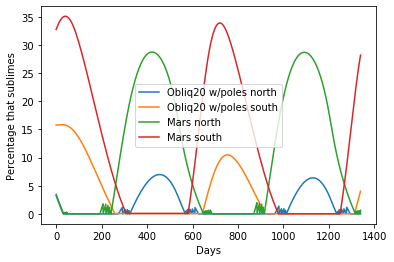

In [97]:
x=range(0,timecount)
plt.xlabel('Days')
plt.ylabel('Percentage that sublimes')
plt.plot(x, compare_north_evap, label = 'Obliq20 w/poles north')
plt.plot(x, compare_south_evap, label = 'Obliq20 w/poles south')
plt.plot(x, mars_north_evap, label = 'Mars north')
plt.plot(x, mars_south_evap, label = 'Mars south')

# Because the Mars and PM happen at diff times the graph is kinda ugly but I think that's because of the model
# not really sure why they seem to have started at diff points but the library is closing so I don't have time to 
# adjust but hopefully the mars file won't be super needed here or it'll somehow work out ok

plt.legend()
plt.show()

In [ ]:
#GETTING THE ATMOSPHERIC COMPOSITION


In [ ]:
# TEST STUFF FOR FILTERING

#     first_6_values=[i[0:6] for i in values_at_time] #First 6 temps at time 1


# print(m_annual.lat)

# north = m_annual.lat.values[m_annual.lat.values>70]

# for x in north:
#     i=0
#     if m_annual.lat.values.any() == x:
#         print(x)
#         for y in m_annual.values[m_annual.values>147]:
#             i+=1
#         print(i)

# print(north)

# print(m_annual.values.shape)
# print(m_annual.lat.values.shape)
# print(m_annual.time.values.shape)
